# Goals

### 1. Understand how you can compare experiments on same data

### 2. Understand where to look for comparison data - logs, charts, graphs, etc when comparing experiments


### 3. Steps
    - You will use gluoncv mxnet backend
    - Train three classifiers by changing parameter - base mode
    - No need to focus on how to change hyper-parameters, will be dealt later
    - Compare the three experiments

### Why compare experiments

    - One usually runs mulitple experiments on the same data by changing hyper-params, base model, etc
    
    - Hence this compare exxperiments feature helps to see which combination og params works the best for that data

# Table of Contents


## [0. Install](#0)


## [1. Train a classifier using Resnet18](#1)


## [2. Train a classifier using Densenet121 ](#2)


## [3. Train a classifier using Mobilenet V3](#3)


## [4. Compare experiments](#4)


## [5. Visualize and study comparison metrics](#5)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 862, done.
remote: Counting objects: 100% (862/862), done.
remote: Compressing objects: 100% (627/627), done.
remote: Total 1905 (delta 417), reused 628 (delta 230), pack-reused 1043
Receiving objects: 100% (1905/1905), 69.53 MiB | 10.64 MiB/s, done.
Resolving deltas: 100% (959/959), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation && pip install -r requirements_cu9.txt

## Dataset - Malarial cell images
    - Credits: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mMEtGIK8UZNCrErXRJR-kutNTaN1zxjC' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1mMEtGIK8UZNCrErXRJR-kutNTaN1zxjC" -O malaria_cell.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq malaria_cell.zip

# Imports 

    - Using single mxnet-gluoncv backend for this tutorial

In [5]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [6]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Train a classifier using Resnet18

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [7]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-resnet18");

Mxnet Version: 1.5.1

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-resnet18
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-resnet18/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-resnet18
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [9]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="resnet18_v2", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1411
    Num val images:   605
    Num classes:      2

Model Params
    Model name:           resnet18_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v2
        Num of potentially trainable layers:  59
        Num of actual trainable layer

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [10]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.712, Train-loss: 0.689 | Val-acc: 0.785124, Val-loss: 0.526, | time: 5.9 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.797, Train-loss: 0.541 | Val-acc: 0.800000, Val-loss: 0.487, | time: 5.2 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.792, Train-loss: 0.550 | Val-acc: 0.841322, Val-loss: 0.411, | time: 5.5 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.773, Train-loss: 0.613 | Val-acc: 0.821488, Val-loss: 0.432, | time: 5.1 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.785, Train-loss: 0.521 | Val-acc: 0.760331, Val-loss: 0.676, | time: 5.2 sec

    Training completed in: 0m 25s
    Best val Acc:          0.841322

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-resnet18/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-resnet18/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:    

<Figure size 432x288 with 0 Axes>

<a id='2'></a>
# Train a classifier using Densenet121

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [12]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-densenet121");

Mxnet Version: 1.5.1

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-densenet121
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-densenet121/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-densenet121
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [14]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="densenet121", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1411
    Num val images:   605
    Num classes:      2

Model Params
    Model name:           densenet121
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           densenet121
        Num of potentially trainable layers:  363
        Num of actual trainable laye

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [15]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.738, Train-loss: 0.676 | Val-acc: 0.793388, Val-loss: 0.478, | time: 14.2 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.751, Train-loss: 0.690 | Val-acc: 0.847934, Val-loss: 0.418, | time: 14.0 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.801, Train-loss: 0.548 | Val-acc: 0.811570, Val-loss: 0.552, | time: 14.0 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.802, Train-loss: 0.525 | Val-acc: 0.828099, Val-loss: 0.489, | time: 14.2 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.826, Train-loss: 0.467 | Val-acc: 0.838017, Val-loss: 0.460, | time: 14.3 sec

    Training completed in: 1m 8s
    Best val Acc:          0.847934

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-densenet121/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-densenet121/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curv

<Figure size 432x288 with 0 Axes>

<a id='3'></a>
# Train a classifier using Mobilenet-v3

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [19]:
gtf = prototype(verbose=1);
gtf.Prototype("Malaria-Cell", "exp-movilenet-v3");

Mxnet Version: 1.5.1

Experiment Details
    Project: Malaria-Cell
    Experiment: exp-movilenet-v3
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-movilenet-v3/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Malaria-Cell
                        |
                        |
                        |-----exp-mobilenet-v3
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

### Load Dataset

In [20]:
gtf.Default(dataset_path="malaria_cell", 
            model_name="mobilenetv3_small", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     malaria_cell
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 1411
    Num val images:   605
    Num classes:      2

Model Params
    Model name:           mobilenetv3_small
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           mobilenetv3_small
        Num of potentially trainable layers:  122
        Num of actual tr

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [21]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.845, Train-loss: 0.380 | Val-acc: 0.894215, Val-loss: 0.293, | time: 22.0 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0097
    [Epoch 2] Train-acc: 0.877, Train-loss: 0.332 | Val-acc: 0.885950, Val-loss: 0.287, | time: 21.6 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009409
    [Epoch 3] Train-acc: 0.879, Train-loss: 0.357 | Val-acc: 0.900826, Val-loss: 0.292, | time: 21.7 sec

    Epoch 4/5
    ----------




    curr_lr - 0.00912673
    [Epoch 4] Train-acc: 0.921, Train-loss: 0.241 | Val-acc: 0.895868, Val-loss: 0.328, | time: 21.7 sec

    Epoch 5/5
    ----------




    curr_lr - 0.008852928099999999
    [Epoch 5] Train-acc: 0.904, Train-loss: 0.287 | Val-acc: 0.890909, Val-loss: 0.315, | time: 21.6 sec

    Training completed in: 1m 46s
    Best val Acc:          0.900826

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-movilenet-v3/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/elemental_features_of_monk/workspace/Malaria-Cell/exp-movilenet-v3/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training c

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Compare experiments

In [22]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [26]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Sample-Comparison-1");

Comparison: - Sample-Comparison-1


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Sample-Comparison-1
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [27]:
gtf.Add_Experiment("Malaria-Cell", "exp-resnet18");
gtf.Add_Experiment("Malaria-Cell", "exp-densenet121");
gtf.Add_Experiment("Malaria-Cell", "exp-movilenet-v3");

Project - Malaria-Cell, Experiment - exp-resnet18 added
Project - Malaria-Cell, Experiment - exp-densenet121 added
Project - Malaria-Cell, Experiment - exp-movilenet-v3 added


### Run Analysis

In [31]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<a id='5'></a>
# Visualize and study comparison metrics

### Training Accuracy Curves

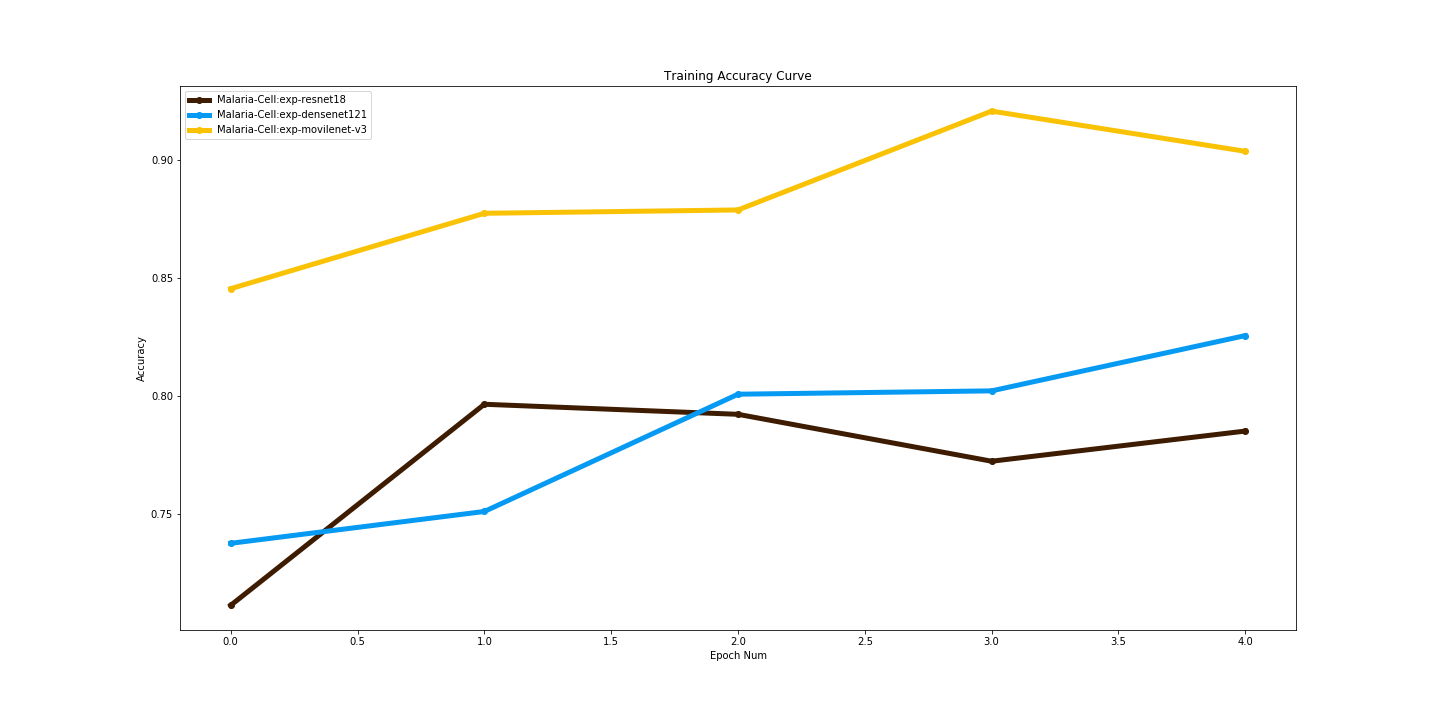

In [34]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/train_accuracy.png") 

### Training Loss Curves

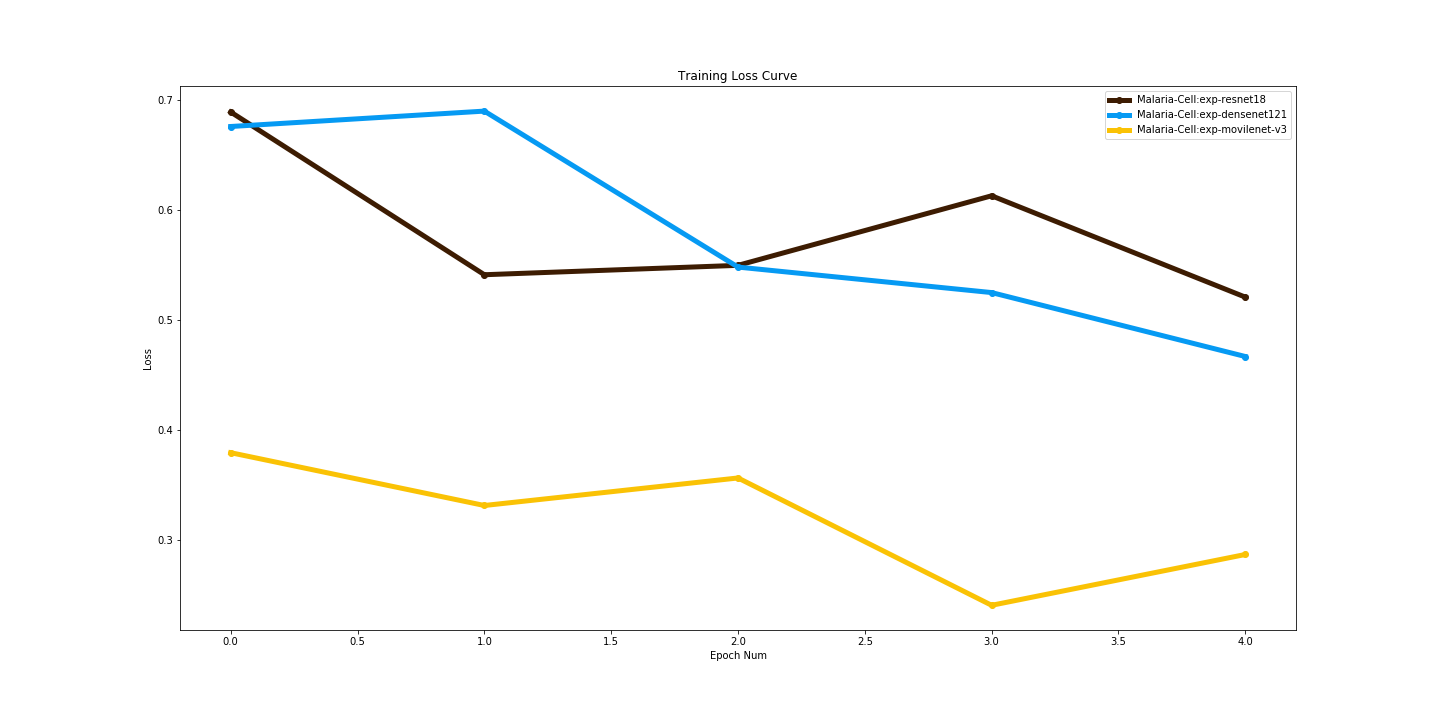

In [37]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/train_loss.png") 

### Validation Accuracy Curves

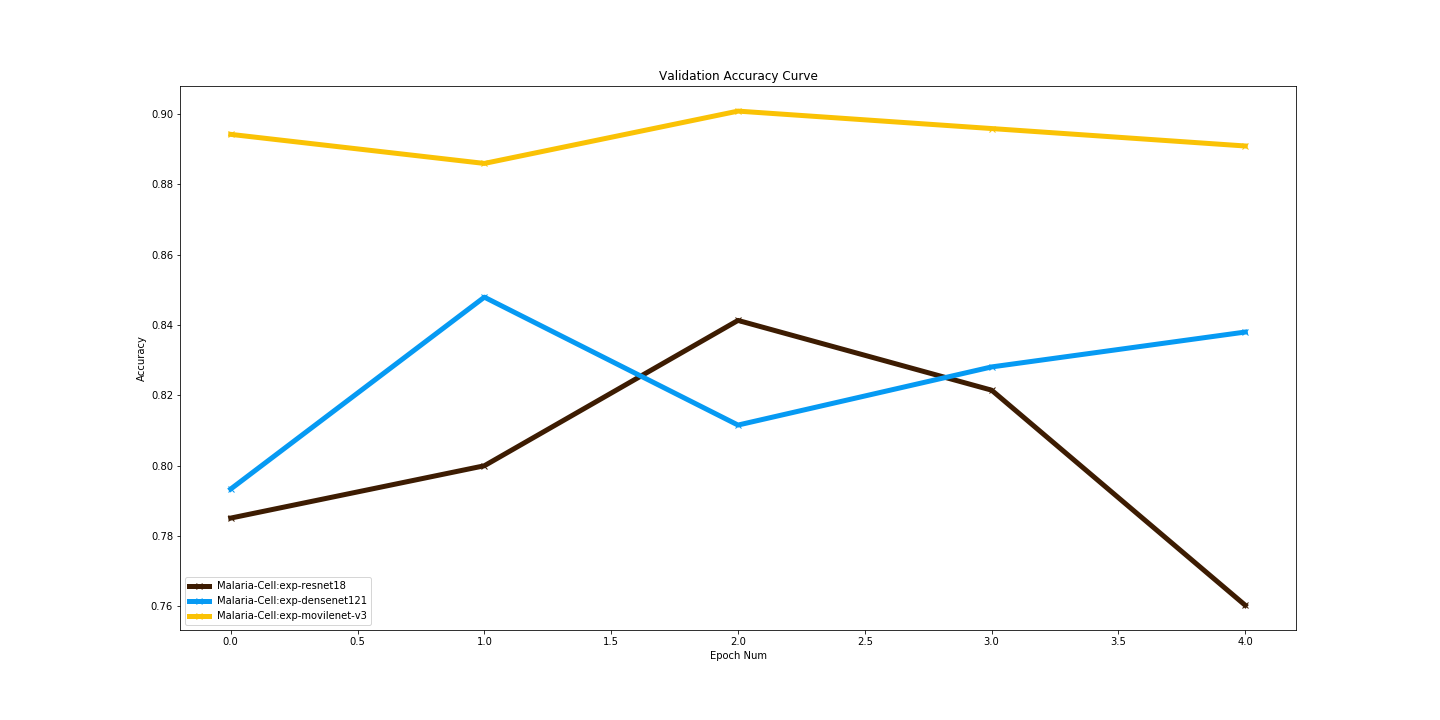

In [36]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/val_accuracy.png") 

### Validation loss curves

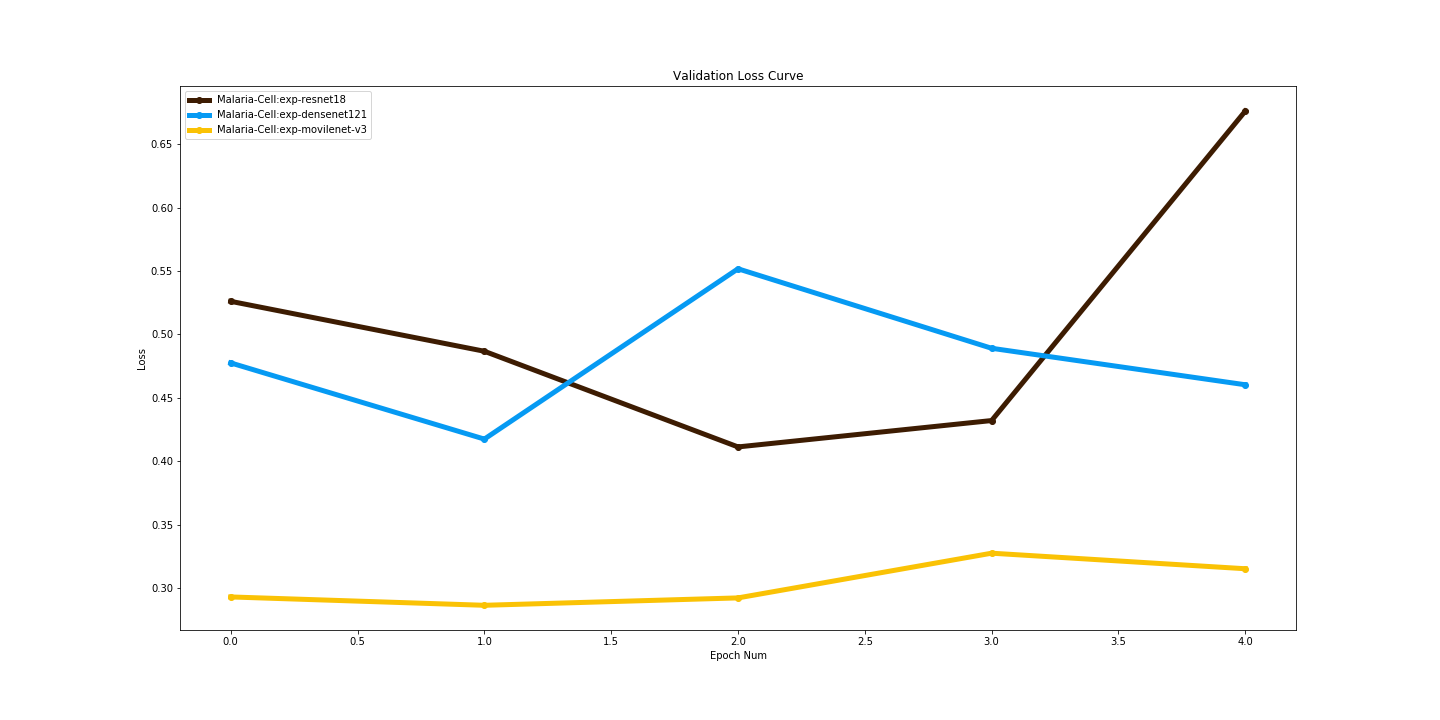

In [38]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/val_loss.png") 

### Training time curves

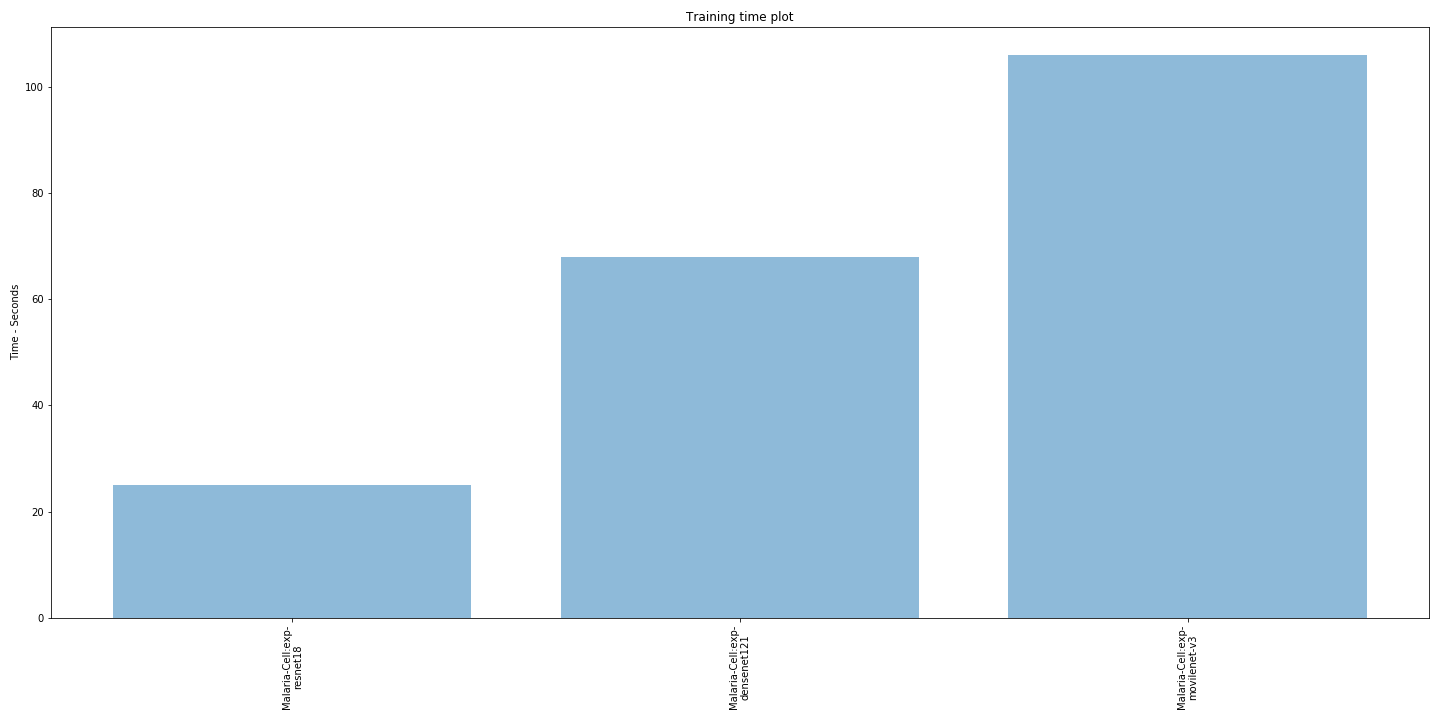

In [40]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/stats_training_time.png") 

### Max GPU usages

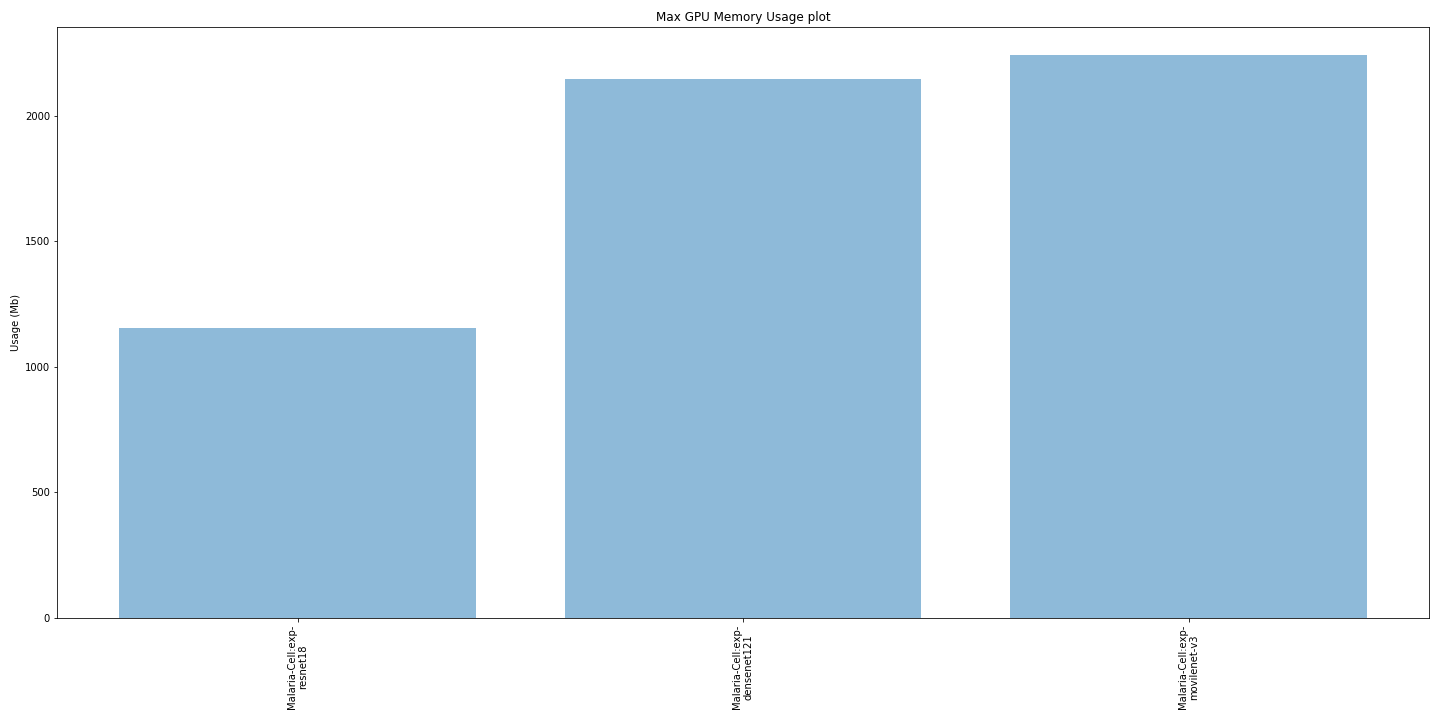

In [43]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/stats_max_gpu_usage.png") 

### Best Validation accuracies

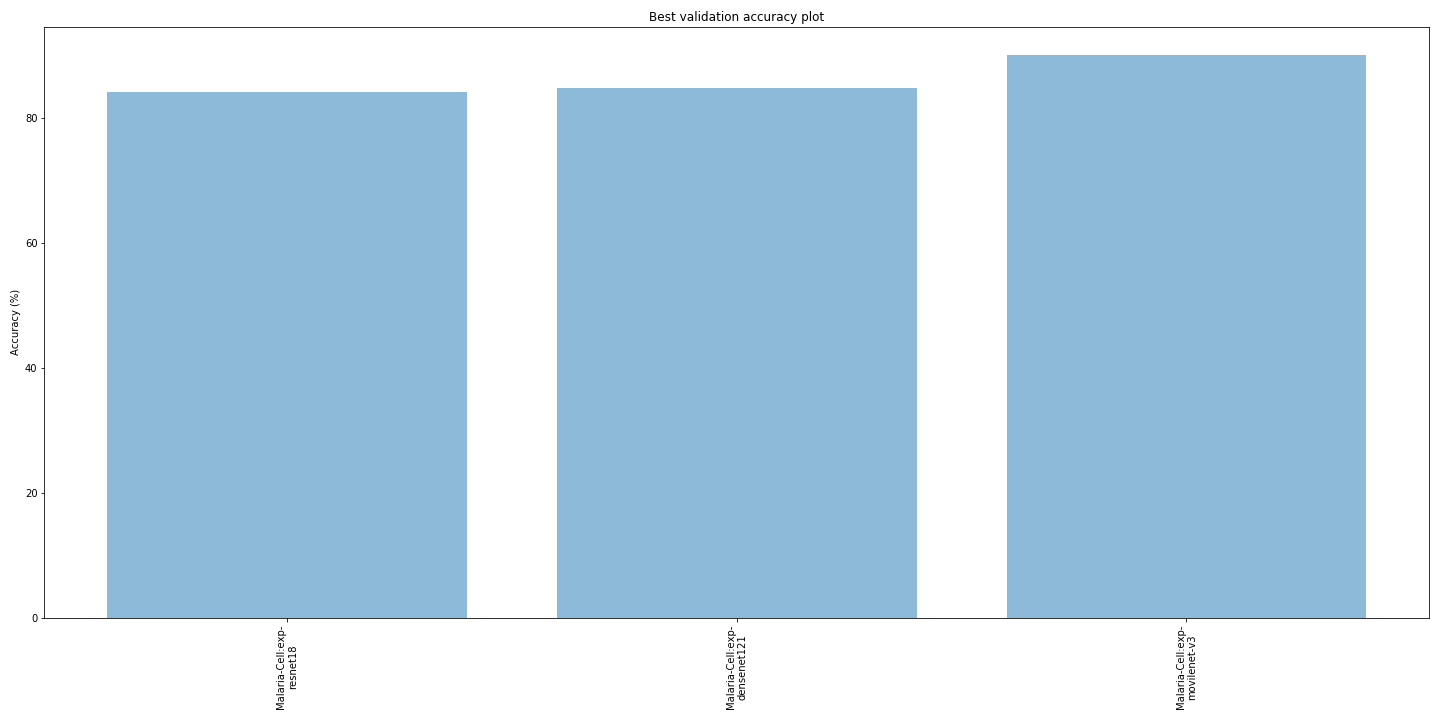

In [42]:
from IPython.display import Image
Image(filename="workspace/comparison/Sample-Comparison-1/stats_best_val_acc.png") 